
\newpage

1 Considere os seguintes algoritmos evolucionários: Estratégias de evolução, programação genética, evolução diferencial e algoritmos de estimação de distribuição. Implemente cada um dos modelos, para os quais pede-se:

(a) Encontre o ótimo da função Ackley bidimensional.


$$f(x)=-\alpha exp( -b\sqrt{\frac{1}{d} \sum \limits _ {i=1} ^{d}x^2_i }) - exp( \frac{1}{d} \sum \limits _ {i=1} ^{d} \cos(cx_i) ) + a + exp(1)$$ 
$$Onde \ a=20, \ b=0.2, \ c=2\pi, \ x_{i} \in [-32.768; 32.768]$$


(b) Encontre o ótimo da função Griewank bidimensional.


$$f(x)=\sum \limits _ {i=1} ^{d} \frac{x^2 _i}{4000} - \prod \cos( \frac{x_i}{\sqrt{i}}) + 1 $$
$$Onde \ x_i \in [-600, 600]$$


(c) Encontre o ótimo da função Trid de dimensão d=5.


$$f(x) = \sum \limits _{i=1} ^{d} (x_i-1)^2 - \sum \limits _{i=2} ^{d} x_i x_{i-1} $$
$$ Onde \ x_i \in [-d^2, d^2], \ i=1,...,d $$


(d) Encontre o ótimo da função Colville de dimensão d=4


$$f(x)=100(x^2_1 - x_2)^2 + (x_1 - 1)^2 + (x_3 - 1)^2 + 90 (x^2_3 - x_4)^2 + 10.1 ( (x_2 - 1)^2 + (x_4 - 1)^2 ) + 19.8 (x_2 - 1)(x_4 - 1) $$
$$Onde \ x_i \in [-10, 10], \ i=1,...,4$$

\newpage

In [2]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt

from utils.GA import GA
from utils.GA import Model as ModelGA
import numpy as np
from utils.ES import ES
from utils.ES import Model as ModelES

import time

# Resolução do Ítem (a)
## Gráfico da Função


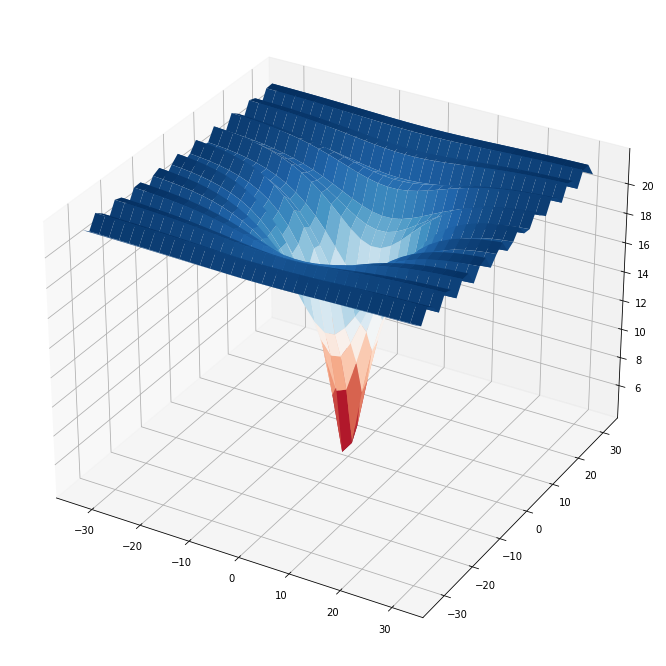

In [2]:
Ackley().graph()

### Evolução Diferencial

In [3]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=100,
    np=200,
    cr=0.9, 
    f=0.8, 
    evfunc='Ackley', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 100


Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Evolução Diferencial cosistiram em:
    * Número de Gerações: 100
    * Tamanho da População: 200
    * Taxa de Cruzamento: 0.9
    * Fator de Escala: 0.8
O algorítmo de mutação empregado consistiu no DE/best/1/bin e o critério de parada do algoritmo consiste no número de gerações.

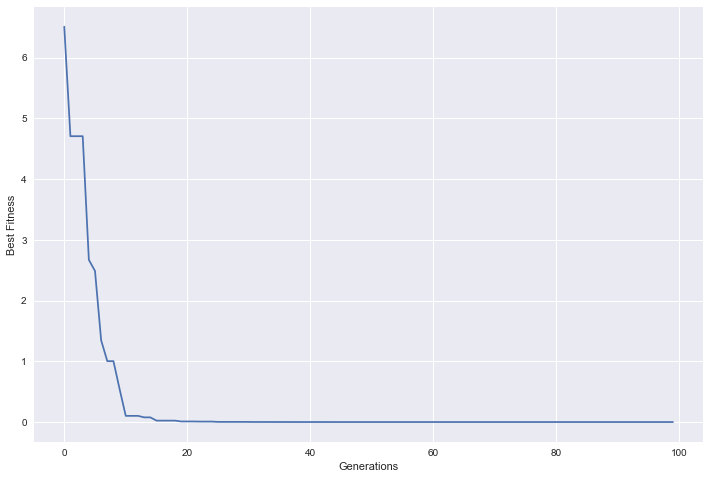

In [4]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()


O gráfico acima destaca o processo de convergência das soluções candidatas para a solução ótima. Percebe-se que o algorítmo converge para a solução ótima em menos de 20 gerações.


In [5]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 3.0456472899231814e-11	Q1: 1.738719435095959e-08	Q2: 8.791494126914046e-06	Q3: 0.003687447932915422	Max: 9.431788683400555e-11
0.3029855824608885



Em torno de 50% das soluções candidatas durante a execução do algoritmo obtiveram o fitness entre 1.738719435095959e-08 e 0.00368, o que destaca que, em sua maioria, as soluções candidatas estavam próximas da solução ótima.


A seguir, será realizada a execução do algoritmo de Evolução Diferencial 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [6]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=100,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Ackley', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 100

In [7]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 2.5446400542250557e-11
Variance: 3.211273975389663e-22
Standard Deviation: 1.7920027833096864e-11


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de 2.5446400542250557e-11 e o desvio padrão 1.7920027833096864e-11.

In [8]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.9204307079315186
Variance: 0.028128673059042434
Standard Deviation: 0.16771604890123792


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 1.92 e desvio padrão de 0.1677.

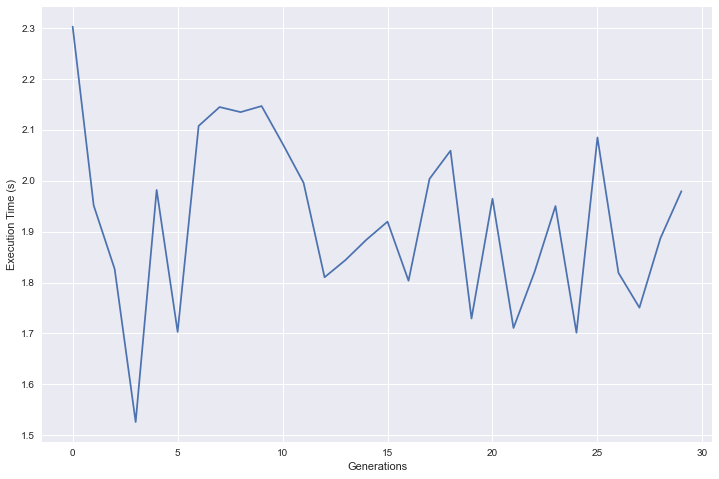

In [9]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Evolução Diferencial em cada uma das 30 iterações.

### Algorítmos de Estimação de Distribuição

In [10]:
all_best_solutions = []
    
cga = CompactGA(
    ng=100,
    np=50, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=5, 
    evfunc='Ackley'
)
cga.evolve()

all_best_solutions = cga.get_all_best_solutions()

GERAÇÃO: 100

Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Estimação de Distribuição  GA Compacto cosistiram em:
    * Número de Gerações: 100
    * Tamanho da População: 50
    * Probabilidade Mínima: 0.04
    * Probabilidade Máxima: 0.93
    * Taxa de Aprendizado: 0.03
    

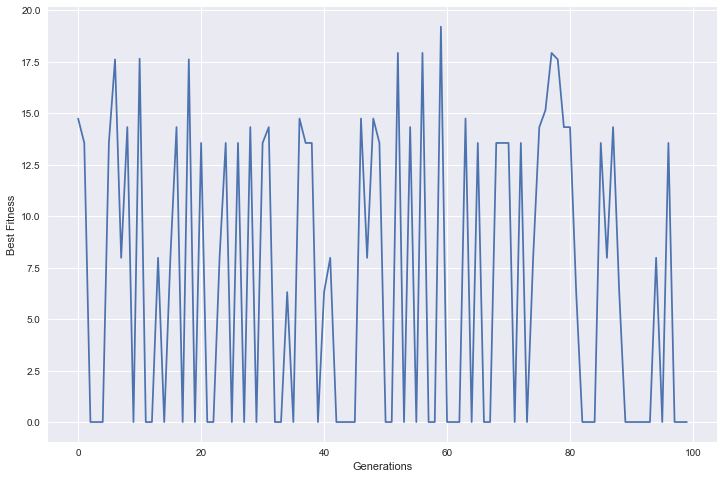

In [11]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

O gráfico acima apresenta o fitness da melhor solução em cada geração.

In [12]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 6.366907001620348e-12	Q1: 8.966040798696895e-09	Q2: 2.5281451540681843e-05	Q3: 0.0165065604971244	Max: 4.306923706565158e-10
0.32664603108552226


Cerca de 50% das melhores soluções candidatas obtveram um valor do fitness entre 8.966040798696895e-09 e 0.0165065604971244.

A seguir, será realizada a execução do algoritmo de Estimação de Distribuição GA Compacto 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [14]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=100,
        np=50, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=5, 
        evfunc='Ackley'
    )
    cga.evolve()

    all_best_solutions.append(cga.get_best_solution())
    all_execution_time.append(cga.get_execution_time())

GERAÇÃO: 100

In [15]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 4.440892098500626e-16
Variance: 0.0
Standard Deviation: 0.0


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de 4.440892098500626e-16 e o desvio padrão 0.0.

In [16]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.9083032925923666
Variance: 0.010296205440169058
Standard Deviation: 0.10147021947433177


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 1.90 e desvio padrão de 0.101.

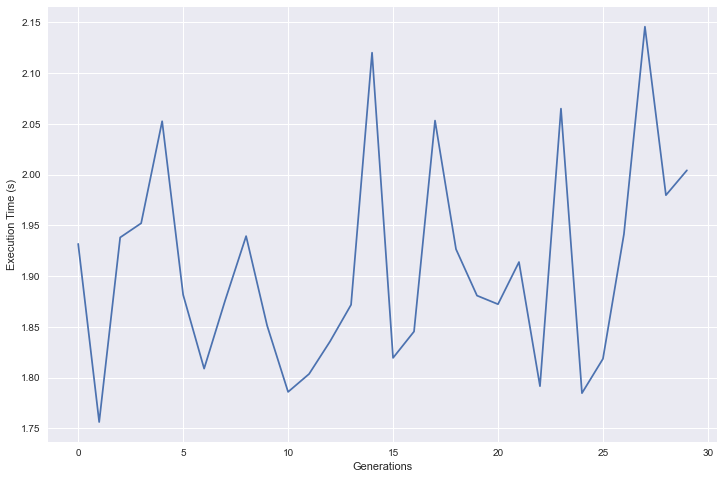

In [17]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Estimação de Distribuição GA Compacto em cada uma das 30 iterações.

## Algoritmo Genético

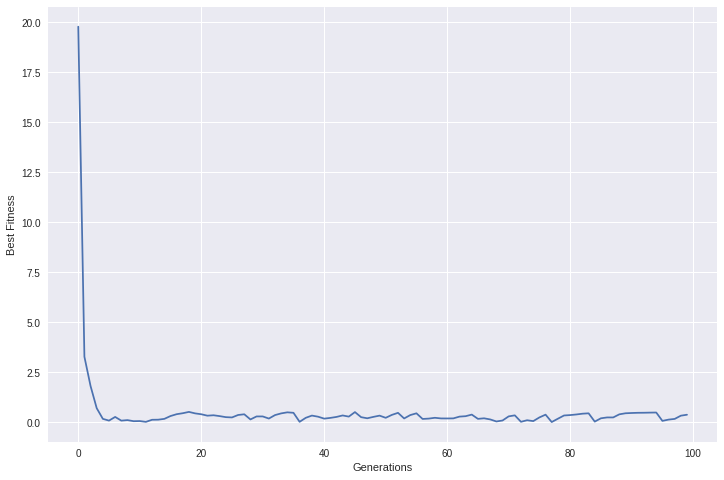

In [ ]:
UB = 32
LB = -32
pop = np.random.uniform(low=LB, high=UB, size=(700,2))
model = ModelGA(
pop,
Ackley().compute, 
"whole arithmetic recombination", 
"uniform mutation",
"fitness proportional selection",
"fitness proportional selection",
0.01,
100,
UB,
LB,
0)
    
ga_alg = GA(model)
stop = time.time();
ga_alg.run(model)
stop = time.time();

x = range(0,100)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)

print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.16186891044770194
Variance: 0.016926329998450913
Standard Deviation: 0.13010122981144687


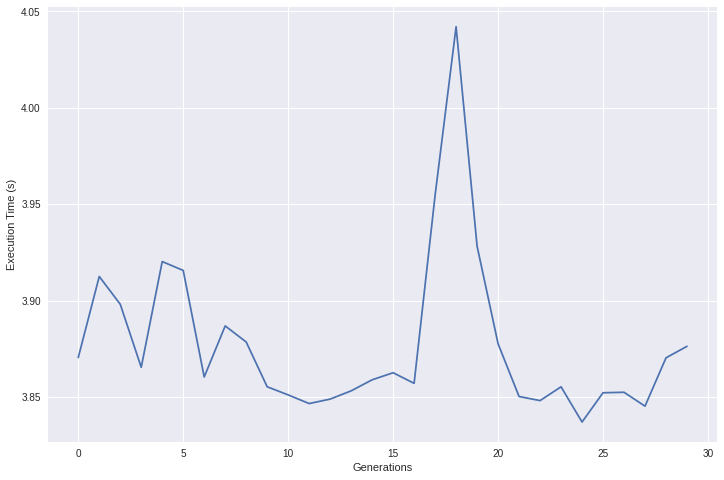

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Estratégia de Evolução

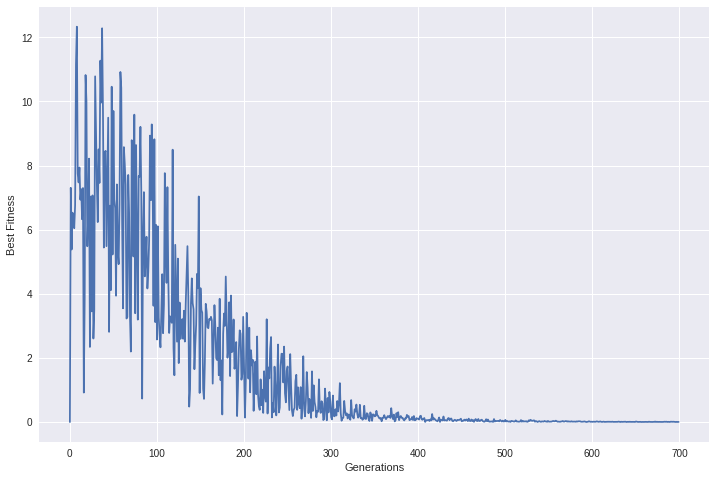

In [ ]:
GENERATIONS = 700;
UB = 32
LB = -32
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,2))
model = ModelES(
pop,
Ackley().compute,
"uniform mutation",
"mu,lambda",
"random",
2,
300,
40,
10,
GENERATIONS,
UB,
LB,
0)

es_alg = ES(model)

es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 8.524294369631017e-08
Variance: 2.105345639508586e-13
Standard Deviation: 4.588404558785751e-07


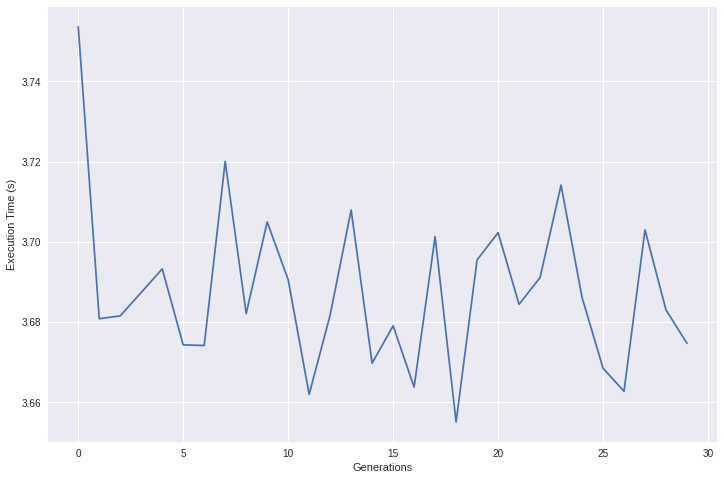

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()